# TP 1

## Ejercicio 1
Implementar un Generador Congruencial Lineal (GCL) de módulo 232 , multiplicador 1013904223,
incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón
de los integrantes del grupo.
* Modificar el GCL implementado para obtener números al azar entre 0 y 1
* Realizar los gráficos que considere adecuados para mostrar las distribuciones de números
al azar generados en ambos casos

### Resolución

El codigo anterior muestra la implementacion de un GLC propuesta por el grupo

In [142]:
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt


class GLC:

    def __init__(self, module, multiplier, seed, increment):
        self.modNumber = module
        self.scalarNumber = multiplier
        self.first = seed
        self.constant = increment
        self.actual = self.first

    def calculate_random(self):
        new_actual = ((self.actual * self.scalarNumber) + self.constant) % self.modNumber
        self.actual = new_actual
        return new_actual

    def calculate_random_uniform(self):
        return (self.calculate_random()) / self.modNumber

    def calculate_multiple_random_uniform(self, iterations):
        values = []
        for i in range(iterations):
            value = self.calculate_random_uniform()
            values.append(value)
        return values
    
    def calculate_multiple_random(self, iterations):
        values = []
        for i in range(iterations):
            value = self.calculate_random()
            values.append(value)
        return values
    
    def calculate_multiple_random_with_range(self, iterations, _min, _max):
        values = []
        for i in range(iterations):
            value = self.calculate_random() % 7
            while (value > _max) or (_min > value):
                value = self.calculate_random() % 7
            values.append(value)
        return values

    def create_plot_uniform(self, quantity):
        random_values = self.calculate_multiple_random_uniform(quantity)
        num_bins = 9
        plt.hist(random_values, num_bins, facecolor='blue', alpha=0.5, ec='black')
        plt.show()
    
    def create_plot(self, quantity):
        random_values = self.calculate_multiple_random(quantity)
        num_bins = 10
        plt.hist(random_values, num_bins, facecolor='blue', alpha=0.5, ec='black')
        plt.show()
        
    def create_plot_with_difference(self, data):
        _counter = Counter({2:2730, 3:5200, 4:1730, 5:480, 6:220})
        _data_given = [2] * 2730
        _data_given += [3] * 5200
        _data_given += [4] * 1730
        _data_given += [5] * 480
        _data_given += [6] * 220
        num_bins = 5
        plt.figure(figsize=(8,6))
        plt.hist(_data_given, bins=num_bins, alpha=0.5, label="data1")
        plt.hist(data, bins=num_bins, alpha=0.5, ec='black', label='data2')
        plt.show()
    
    def create_counter(self, iterations, possible_numbers):
        random_values = self.calculate_multiple_random(iterations)
        counter = Counter(random_values)
        if len(counter) != possible_numbers:
            return None
        if len(set(counter.values())) != possible_numbers:
            return None
        return counter
    
    def plot_counter(self, data):
        density, bins, _ = plt.hist(data, density=True, bins=20)
        count, _ = np.histogram(data, bins)
        for x,y,num in zip(bins, density, count):
            if num != 0:
                plt.text(x, y+0.05, num, fontsize=10, rotation=-90) # x,y,str
                
    def chequear_dif(self, data):
        counter = Counter(data)
        for i in [2,3,4,5,6]:
            if not i in counter.keys():
                return 10000
        score = abs(2730 - counter[2])
        score += abs(5200 - counter[3])
        score += abs(1730 - counter[4])
        score += abs(480 - counter[5])
        score += abs(220 - counter[6])
        return score



A continuacion, se muestran distintos ejemplos con diferentes numeros de iteraciones para distribución no uniforme

In [46]:
_seed = (98541 + 100033 + 95282 + 94839) / 4
glc = GLC(module=232, 
          multiplier=1013904223,
          seed=97174, 
          increment=1664525)

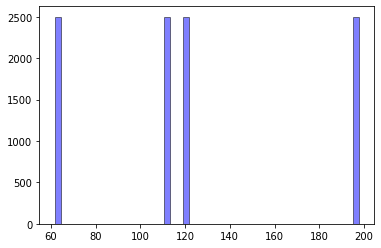

In [29]:
glc.create_plot(10000)

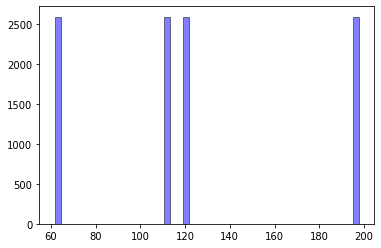

In [30]:
glc.create_plot(10349)

In [ ]:
glc.create_plot(348)

A continuacion, se muestran distintos ejemplos con diferentes numeros de iteraciones para distribución uniforme

In [ ]:
glc.create_plot_uniform(100000)

In [ ]:
glc.create_plot_uniform(12341)

In [ ]:
glc.create_plot_uniform(348)

## Ejercicio 2

Dada una variable aleatoria X se generaron 10.000 muestras y se obtuvo el siguiente histograma

* Utilizando el GCL implementado en el Ejercicio 1 a), desarrollar un algoritmo para generar 100.000 muestras de la variable X
* Proponer un test para evaluar si las muestras generadas en el ítem a) siguen la distribución esperada. Considerar distintos tamaños de muestra.

### Resolución

Se utiliza la misma implementación de GLC utilizada en el primer ejercicio

Sabiendo que las reglas son

* module > 0 
* 0<multiplier<module
* 0<=increment<module 
* 0<=seed<module

11
191
260
260


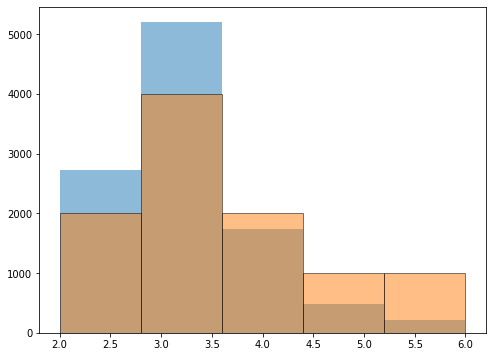

In [131]:
glc = GLC(module=13, 
          multiplier=1013904223,
          seed=97174, 
          increment=10)
a = glc.calculate_multiple_random_with_range(10000,2, 7)

def xx():
    glc = None
    dif = 10000
    module = 10
    for i in range(10, 270):
        new_glc = GLC(module=i, multiplier=1013904223, seed=97174, increment=10)
        data = new_glc.calculate_multiple_random_with_range(10000,2, 7)
        new_dif = new_glc.chequear_dif(data)
        if dif > new_dif:
            glc = new_glc
            dif = new_dif
            module = i
            print(module)
    print(module)
    return glc
        
glc = xx()
a = glc.calculate_multiple_random_with_range(10000,2, 7)
glc.create_plot_with_difference(a)

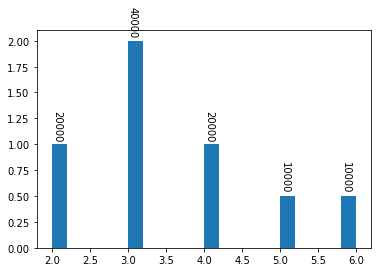

In [143]:
glc = GLC(module=260, multiplier=1013904223, seed=97174, increment=10)
data = glc.calculate_multiple_random_with_range(100000, 2, 7)
glc.plot_counter(data)

## Ejercicio 3

Implementar un método para generar variables aleatorias con distribución normal de media 15 y desvío 2.

* Generar 100.000 muestras, calcular la media y la varianza de la distribución obtenida y
comparar con los valores teóricos.
* Calcular el factor de rendimiento del método propuesto.
* Mostrar gráficamente la distribución que siguen las muestras generadas.
* Proponer un test para verificar si los números generados siguen la distribución pedida.

### Resolución

Para este ejercicio usaremos el método de Aceptación - Rechazo

In [9]:
import random
import math
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

In [10]:
media = 15 # dato del enunciado
desvio = 2 # dato del enunciado
muestras = 100_000 # dato del enunciado
c = 1.3 # es fx/fy que maximiza el cociente

In [11]:
resultados = []

def cociente(t):
    # es la division de fx/c*fy
    return (1 / math.sqrt(2 * math.pi)) * math.exp(t - (t**2 / 2)) * 1/c

for i in range(muestras):
    t = random.expovariate(1) # muestra exponencial de media 1
    u = random.random()
    if u < cociente(t):
        u2 = random.random()
        if u2 < 0.5:
            resultados.append(t)
        else:
            resultados.append(-t)

In [12]:
# Aplicamos transformacion de Normal std a lo pedido
transformada = [r * desvio + media for r in resultados]

In [13]:
print(f'Esperanza real: {media} - Esperanza simulada: {np.mean(transformada)}')
print(f'Varianza real: {desvio**2} - Varianza simulada: {np.var(transformada)}')


Esperanza real: 15 - Esperanza simulada: 15.000205037559907
Varianza real: 4 - Varianza simulada: 3.967715968007497


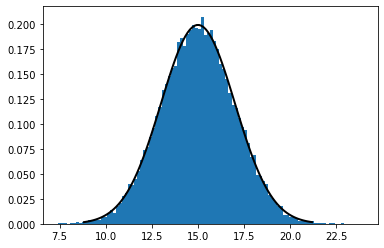

In [14]:
# Creo la normal real para plotear la curva y comparar
x_real = np.linspace(norm.ppf(0.001, media, desvio), norm.ppf(0.999, media, desvio), 100)
fig, ax = plt.subplots(1, 1)

y_real = norm(media, desvio)
ax.plot(x_real, y_real.pdf(x_real), 'k-', lw = 2)

ax.hist(transformada, 100, density=True)
plt.show()

Para verificar si los numeros generados siguen la distribución pedida se puede usar un test de frecuencia, ya que estos tests justamente buscan comprobar que los numeros generados se distribuyan siguiendo la función de probabilidad esperada.

In [15]:
transformada[0:10]

[12.973061623849274,
 14.9409163663375,
 11.748550867897706,
 13.624046236275033,
 15.051232042194377,
 14.478325058704339,
 15.853231007070974,
 13.65499060117974,
 15.24932000566464,
 14.501852706715407]

## Ejercicio 4

La llegada de vehículos a un estacionamiento sigue un proceso de Poisson de tasa λ
vehículos/hora. En el trabajo práctico se incluye un archivo con números pseudoaleatorios que
representan los tiempos entre arribos de dichos vehículos.

* Realice una estimación de la tasa de arribos y proponga un test para evaluar si los números pseudoaleatorios provistos siguen la distribución esperada.
* Utilizando el GCL implementado en el Ejercicio 1 a) simular la llegada de vehículos durante un mes. Graficar la cantidad de arribos en función del tiempo.
* Generar 1000 realizaciones del proceso de Poisson para estimar las siguientes probabilidades:
1. Probabilidad que el primer vehículo arribe antes de los 10 minutos.
2. Probabilidad que el undécimo vehículo arribe después de los 60 minutos.
3. Probabilidad que arriben al menos 750 vehículos antes de las 72 horas.
Comparar con los valores teóricos.

## Ejercicio 5

Basados en el trabajo “Using Cellular Automata to Investigate Pedestrian Conflicts with Vehicles in
Crosswalk at Signalized Intersection”, de Xiaomeng Li, Xuedong Yan, Xingang Li, y Jiangfeng Wang
realizar lo siguiente:
* Simular al menos 2 escenarios planteados en el trabajo y comparar sus resultados.
* Proponer al menos 2 modificaciones a los escenarios planteados para peatones, autos, semáforos y arterias de circulación, simularlas y comparar estos resultados con los del ítem anterior.
* Realizar los gráficos que se consideren necesarios para mostrar los resultados
* Seleccionar un escenario de los simulados y realizar una animación.